| Problem | Formula|Search Domain|
|---      |----    |----|
|ZDT1|${\text{Min}}={\begin{cases}f_{1}\left(x\right)=x_1\\h(f_1, g)= 1-\sqrt{f1/g} \\\end{cases}} \text{   where}, g(x) = 1+ \frac{9}{n-1}\sum_{i=2}^{n}x_i$|$0\leq{x_i}\leq{1}, i=2, ...n$|
|ZDT2|${\text{Min}}={\begin{cases}f_{1}\left(x\right)=x_1\\h(f_1, g)= 1-(f1/g)^2 \\\end{cases}} \text{  where}, g(x) = 1+ \frac{9}{n-1}\sum_{i=2}^{n}x_i$|$0\leq{x_i}\leq{1}, i=2, ...n$|
|ZDT3|${\text{Min}}={\begin{cases}f_{1}\left(x\right)=x_1\\h(f_1, g)= 1-\sqrt{f1/g}-(f_1/g)sin(10\pi f_1) \\\end{cases}} \text{   where}, g(x) = 1+ \frac{9}{n-1}\sum_{i=2}^{n}x_i$|$0\leq{x_i}\leq{1}, i=2, ...n$|

# ZDT3 problem 
## - (#variables / #objectives)
## - 10/2
## - 20/2

 - `#PBS -l ncpus=4,mem=16GB`
 - `#PBS -l walltime=10:00:00`
 - `#PBS -q normal`

## Parameter list 
- do for a in nsga2 nsga3 agnomen rnsga2 `algorithm list`
- do for n_gen in 100 200 500 1000    `iterations`
- do for pop in 40 100 200            `population size`


In [17]:
import time 
import xlsxwriter
from pymoo.indicators.hv import Hypervolume
from pymoo.factory import get_performance_indicator
from pymoo.indicators.igd_plus import IGDPlus
import sys,os 
from PIL import Image               # to load images
from IPython.display import display # to display images
import pandas as pd 
import pandas as pd 
import numpy as np, os ,sys 
from matplotlib import pyplot as plt 
ref_point = None
pf = None
def calculate_hv(result):
    path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())),result['path'])
    F = np.loadtxt(path)
    metric = Hypervolume(nds=True,ref_point = ref_point,norm_ref_point=False)
    igd_plus = IGDPlus(pf,zero_to_one=False)
    start_time = time.time()
    hv = metric.do(F)
    igd_plus = igd_plus.do(F)
    exc_time = time.time() - start_time
    return [hv,igd_plus,exc_time]
def hv_result(result):
    get = result.apply(calculate_hv, axis=1)
    nadir_arr  = np.array([np.fromstring(i[1:-1],dtype=float, sep=' ') for i in np.array(result['approx_nadir'])])
    df = pd.DataFrame(get.tolist(), columns = ['hv','igd_plus','hv_exc_time'])
    final_result = pd.concat([result, df],axis=1)

    final_result.loc[:,'nadir_point'] =  list(nadir_arr)
    final_result.loc[:,'ref_point'] = str(ref_point)

    output_result = final_result[['Problem', 'Alg_name', 'Evaluations','Iteration', 
    'Objectives', 'n_variables','hv','igd_plus','pop_size','solutions_shape',
    'nadir_point','ref_point',
    'exec_time', 
    'hv_exc_time', 'path', 'image_location']]
    print(f'ref_point is {ref_point}')
    output_result = output_result.sort_values(['Alg_name','Evaluations','igd_plus','hv'],ascending =False).reset_index(drop=True)
    return output_result
cdir =os.getcwd()
pd.set_option('display.float_format', lambda x : "%.7f" % x)

In [18]:
folder_2 = os.path.dirname(folder)
folder_2
pd.set_option('display.max_rows', None)
folder = os.path.dirname(os.getcwd())
filename = 'result_PI'
path = os.path.join(folder, filename)

result = pd.read_csv(path)

result = result.drop(columns=['xl','xu'])

result = result.loc[result['Problem']=='ZDT3'].reset_index(drop=True)
zdt3_10= result.loc[result['n_variables']==10].reset_index(drop=True)
zdt3_20= result.loc[result['n_variables']==20].reset_index(drop=True)
print(f"The number of records {len(zdt3_10)}")
print(f"The number of records {len(zdt3_20)}")

The number of records 72
The number of records 72


# zdt3 with 10 variables

In [19]:
#path and image path indicating location of objective file and visualization file
zdt3_10.iloc[:,-2:].head(5)

,path,image_location
0,Result/ZDT3/NSGA2_ZDT3_10/ZDT3_NSGA2_Iteration...,Result/Images/ZDT3/NSGA2_ZDT3Var-10/ZDT3_NSGA2...
1,Result/ZDT3/NSGA2_ZDT3_10/ZDT3_NSGA2_Iteration...,Result/Images/ZDT3/NSGA2_ZDT3Var-10/ZDT3_NSGA2...
2,Result/ZDT3/NSGA2_ZDT3_10/ZDT3_NSGA2_Iteration...,Result/Images/ZDT3/NSGA2_ZDT3Var-10/ZDT3_NSGA2...
3,Result/ZDT3/NSGA2_ZDT3_10/ZDT3_NSGA2_Iteration...,Result/Images/ZDT3/NSGA2_ZDT3Var-10/ZDT3_NSGA2...
4,Result/ZDT3/NSGA2_ZDT3_10/ZDT3_NSGA2_Iteration...,Result/Images/ZDT3/NSGA2_ZDT3Var-10/ZDT3_NSGA2...


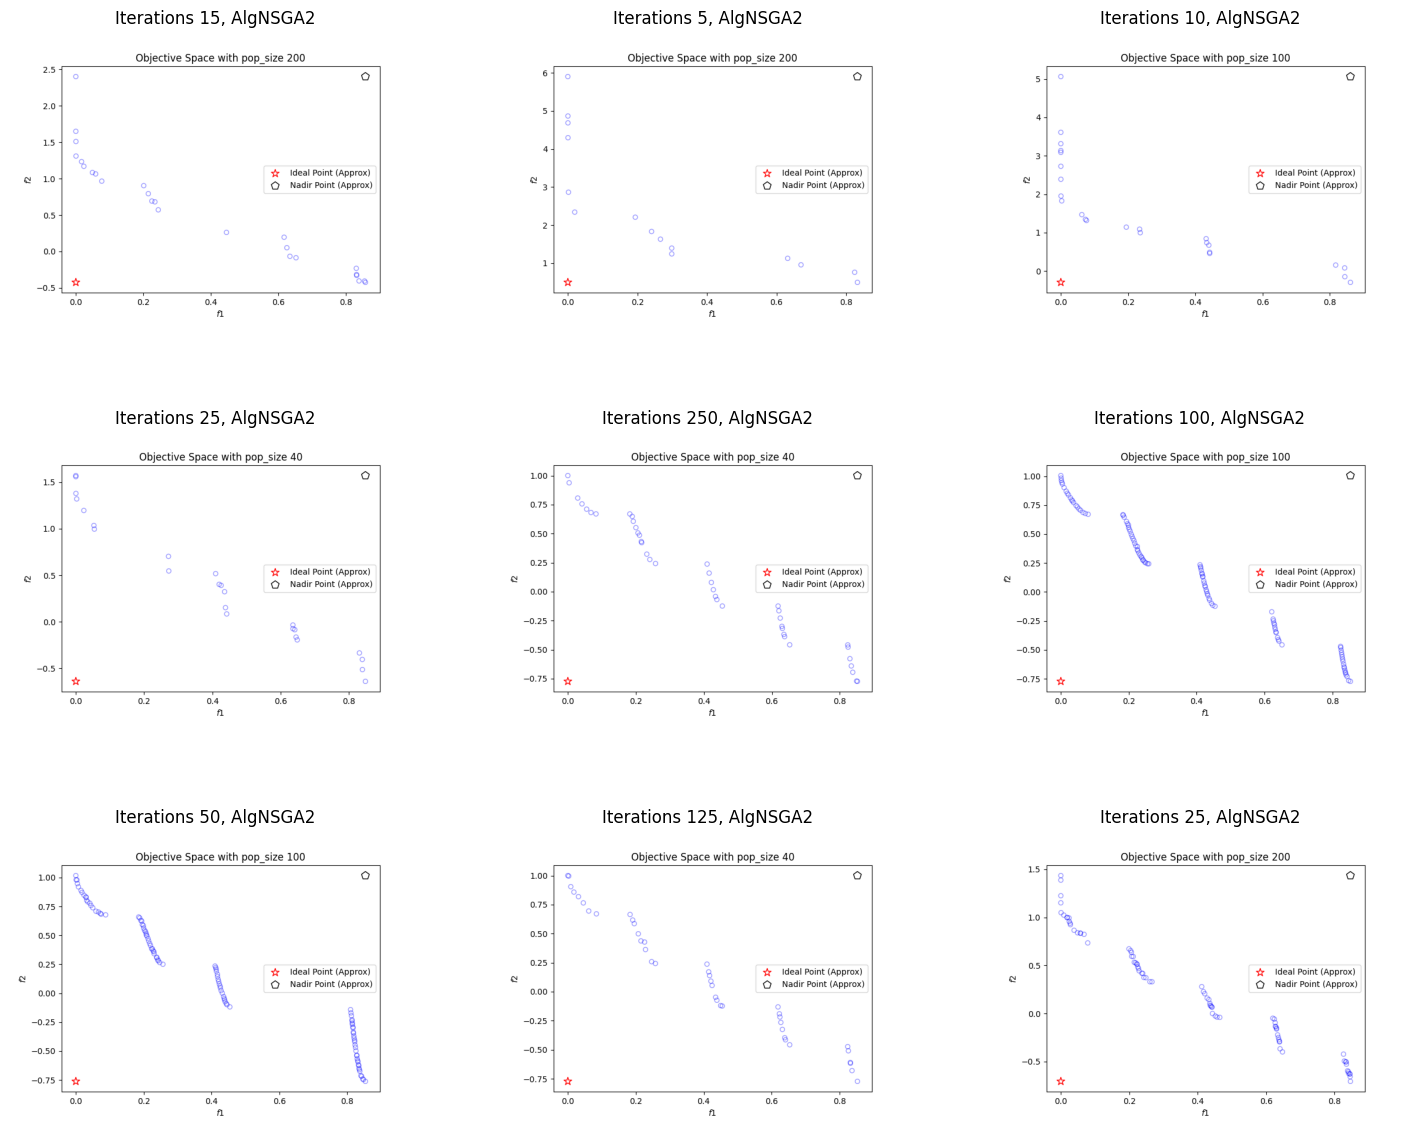

In [20]:
# more figures can be found here: Result/Images/KUR1/..

plt.subplots(figsize=(18,15), dpi=100)
for i in range(9):
    plt.subplot(3,3,i+1)
    f = zdt3_10['image_location'][i]
    path = os.path.join(folder_2,f )+'.png'
    img = Image.open(path)
    plt.title(f'Iterations {zdt3_10.Iteration[i]}, Alg{zdt3_10.Alg_name[i]}')
    plt.axis('off')
    plt.imshow(img)

In [21]:
nadir_arr  = np.array([np.fromstring(i[1:-1], dtype=float, sep=' ') for i in np.array(zdt3_10['approx_nadir'])])

print(f'Global nadir point for kur1 with two variables is :{np.round(np.max(nadir_arr, axis=0),2)}')

ref_point = np.array([1 ,1])
pf = np.loadtxt(os.path.join(cdir, 'Bench/zdt3_10_pf' ))
zdt3_10_table_1 = hv_result(zdt3_10)

Global nadir point for kur1 with two variables is :[0.87 6.78]
ref_point is [1 1]


In [22]:
ref_point = np.array([5 ,5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/zdt3_10_pf' ))
zdt3_10_table_2 = hv_result(zdt3_10)

ref_point is [5 5]


In [23]:
ref_point = np.array([1 ,7])
pf = np.loadtxt(os.path.join(cdir, 'Bench/zdt3_10_pf' ))
zdt3_10_table_3 = hv_result(zdt3_10)

ref_point is [1 7]


In [24]:
pd.concat([zdt3_10_table_1,zdt3_10_table_2,zdt3_10_table_3]).to_excel('Excel/zdt3_10.xlsx', engine = 'xlsxwriter')

# zdt3 with 20 variables

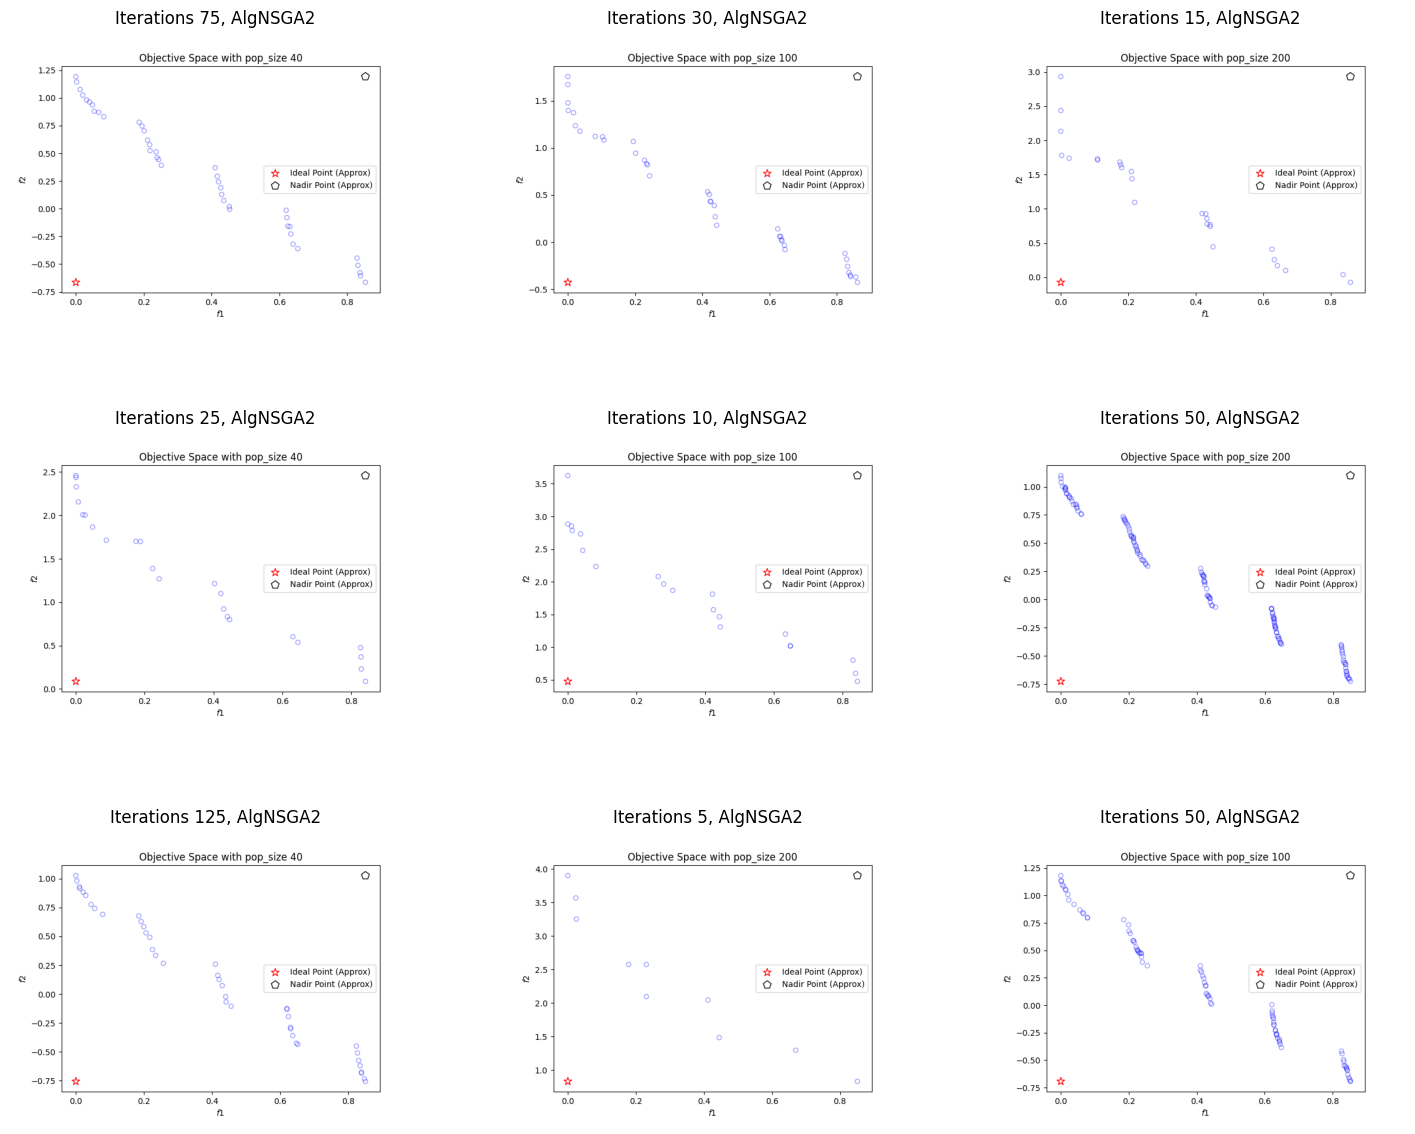

In [25]:
# more figures can be found here: Result/Images/KUR1/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(9):
    plt.subplot(3,3,i+1)
    f = zdt3_20['image_location'][i]
    path = os.path.join(folder_2,f )+'.png'
    img = Image.open(path)
    plt.title(f'Iterations {zdt3_20.Iteration[i]}, Alg{zdt3_20.Alg_name[i]}')
    plt.axis('off')
    plt.imshow(img)

In [26]:
nadir_arr  = np.array([np.fromstring(i[1:-1], dtype=float, sep=' ') for i in np.array(zdt3_20['approx_nadir'])])

print(f'Global nadir point for kur1 with two variables is :{np.round(np.max(nadir_arr, axis=0),2)}')

ref_point = np.array([1,1])
pf = np.loadtxt(os.path.join(cdir, 'Bench/zdt3_20_pf' ))
zdt3_10_table_1 = hv_result(zdt3_20)

Global nadir point for kur1 with two variables is :[0.87 5.26]
ref_point is [1 1]


In [27]:
ref_point = np.array([5,5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/zdt3_20_pf' ))
zdt3_10_table_2 = hv_result(zdt3_20)

ref_point is [5 5]


In [28]:
ref_point = np.array([1,5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/zdt3_20_pf' ))
zdt3_10_table_3 = hv_result(zdt3_20)

ref_point is [1 5]


In [29]:
pd.concat([zdt3_10_table_1,zdt3_10_table_2,zdt3_10_table_3]).to_excel('Excel/zdt3_20.xlsx', engine = 'xlsxwriter')